# COVID-19 data tracker
Data source: from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE, data obtained from [covid-data-api](https://pypi.org/project/covid-data-api/)

In [14]:
from covid.api import CovId19Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import altair as alt

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
api = CovId19Data(force=False)

In [3]:
overall_stats = api.get_stats()
overall_stats

{'confirmed': 1976191,
 'recovered': 474261,
 'deaths': 125984,
 'last_updated': '2020-04-14 00:00:00'}

## 1) Bar plot of today's COVID cases across the world (from available countries)
Show top 20 countries.

In [4]:
countries = api.show_available_countries()

In [5]:
# api.show_available_regions()

In [6]:
recs = api.get_all_records_by_country()
# recs

Read the data in JSON format and reshape it into a dataframe

In [40]:
tmp = pd.json_normalize(recs, max_level=0).rename(index={0:'info'}).T
tmp

df = pd.json_normalize(tmp['info']) #.rename(index={idx:country for idx,country in enumerate(tmp.index)})
df.replace({'label':{'US': 'United States of America', 'Taiwan*':'Taiwan'}}, inplace=True)
df['confirmed_log10'] = np.log10(df['confirmed'])

# df.set_index('label', inplace=True)
# df.reset_index(inplace=True)
# df.drop(columns='label')
df.head()

,confirmed,label,last_updated,lat,long,recovered,deaths,confirmed_log10
0,714,Afghanistan,2020-04-14 00:00:00,33,65,40,23,2.853698
1,475,Albania,2020-04-14 00:00:00,41.1533,20.1683,248,24,2.676694
2,2070,Algeria,2020-04-14 00:00:00,28.0339,1.6596,691,326,3.315970
3,659,Andorra,2020-04-14 00:00:00,42.5063,1.5218,128,31,2.818885
4,19,Angola,2020-04-14 00:00:00,-11.2027,17.8739,5,2,1.278754


Show confirmed cases and deaths by country

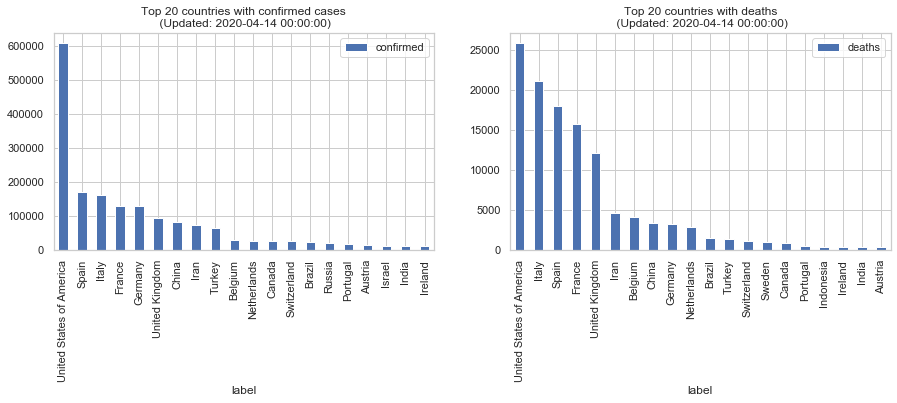

In [10]:
date = df['last_updated'][0]

plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,2,1)
df[['confirmed', 'label']].sort_values(
    'confirmed', ascending=False).iloc[:20].plot.bar(x='label', 
                                                     y='confirmed', 
                                                     ax=ax1,
                                                    title=f"Top 20 countries with confirmed cases\n (Updated: {date})");
ax2 = plt.subplot(1,2,2)
df[['deaths', 'label']].sort_values(
    'deaths', ascending=False).iloc[:20].plot.bar(x='label', 
                                                  y='deaths', 
                                                  ax=ax2,
                                                 title=f"Top 20 countries with deaths\n (Updated: {date})");

Display numbers using map

In [21]:
df2 = (df[['label', 'recovered', 'deaths', 'confirmed']]
       .set_index('label')
       .sort_values('confirmed', ascending=False)
       .iloc[:20])
        
df2.head()
# df2.shape

,recovered,deaths,confirmed
label,,,
United States of America,47763,25832,607670
Spain,67504,18056,172541
Italy,37130,21067,162488
France,29098,15748,131361
Germany,68200,3294,131359


In [39]:
df

,date,confirmed,change_confirmed,recovered,change_recovered,deaths,change_deaths
0,2020-01-22,0,na,0,na,0,na
1,2020-01-23,0,na,0,na,0,na
2,2020-01-24,0,na,0,na,0,na
3,2020-01-25,0,na,0,na,0,na
4,2020-01-26,0,na,0,na,0,na
...,...,...,...,...,...,...,...
79,2020-04-10,40,0.02564102564102564,25,0.041666666666666664,2,1.0
80,2020-04-11,40,0.0,28,0.12,2,0.0
81,2020-04-12,43,0.075,30,0.07142857142857142,2,0.0
82,2020-04-13,45,0.046511627906976744,30,0.0,2,0.0


In [38]:
df3 = (df[['label', 'change_deaths', 'change_confirmed', 'change_recovered']]
    .set_index('label')
    .sort_values('change_confirmed', ascending=False)
    .iloc[:10]
    .rename(columns={'change_deaths':'succumbed', 
        'change_confirmed': 'confirmed', 
        'change_recovered':'recovered'}))

KeyError: "['label'] not in index"

In [122]:
world_geo = 'world-countries.json'

world_map = folium.Map(location=[30,0], zoom_start=1.5)

folium.Choropleth(
    geo_data=world_geo, 
    data=df,
    name='choropleth',
    key_on='properties.name',
    fill_color='BuGn',
    fill_opacity=0.5,
    line_opacity=1,
    columns=['label', 'confirmed_log10'], 
    legend_name='Confirmed COVID-19 cases (log10)').add_to(world_map)
    
world_map

In [49]:
api.show_available_countries()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

## 2) Plot COVID-19 history by country

In [29]:
country = 'Zambia'
tmp = api.get_history_by_country(country)
tmp_df = (pd.json_normalize(tmp[country]['history'], max_level=0)
          .rename(index={0:'info'})
          .T
          .reset_index())
tmp_df.rename(columns={'index':'date'}, inplace=True)
df = pd.concat([tmp_df[['date']], pd.json_normalize(tmp_df['info'])], axis=1)
df['date'] = pd.to_datetime(df['date'])

df
# df['country'] = country
# df.groupby('country')
# df

# plt.figure(figsize=(15, 4))
# ax1 = plt.subplot(1,1,1)
# df.plot.line(x='date', 
#              y=['confirmed', 'recovered', 'deaths'], 
#              ax=ax1, 
#              title=f"{country.capitalize()}");

KeyError: 'Zambia'

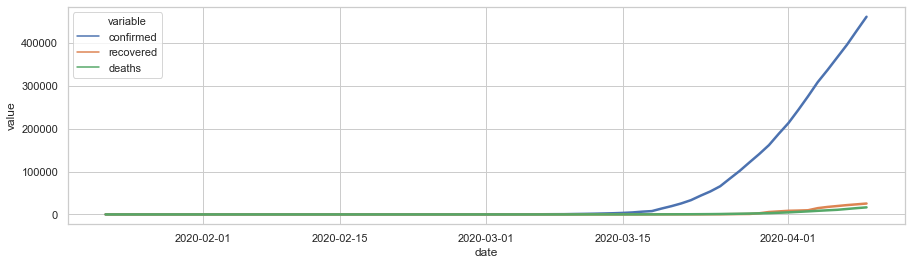

In [222]:
plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1,1,1)
sns.lineplot(data=pd.melt(df[['date', 'confirmed', 'recovered', 'deaths']], id_vars='date'), 
             x='date', 
             y='value',
             hue='variable',
             linewidth=2.5, 
             ax=ax1);



## 3) Compare history between countries

In [235]:
def history(country):
    """get dataframe of COVID-19 history based on country"""
#     country = 'taiwan'
    tmp = api.get_history_by_country(country)
    tmp_df = pd.json_normalize(tmp[country]['history'], max_level=0).rename(index={0:'info'}).T.reset_index()
    tmp_df.rename(columns={'index':'date'}, inplace=True)
    df = pd.concat([tmp_df[['date']], pd.json_normalize(tmp_df['info'])], axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['country'] = country
    return df

def compare_plot(country1, country2):
    df1 = history(country1)
    df2 = history(country2)

    # plot
    plt.figure(figsize=(15, 4))
    ax1 = plt.subplot(1,1,1)
    df = pd.concat([df1, df2], axis=0)
    sns.lineplot(data=pd.melt(df[['date', 'confirmed', 'recovered', 'deaths']], id_vars='date'), 
                 x='date', 
                 y='value',
                 hue='variable',
                 linewidth=2.5, 
                 ax=ax1);
    

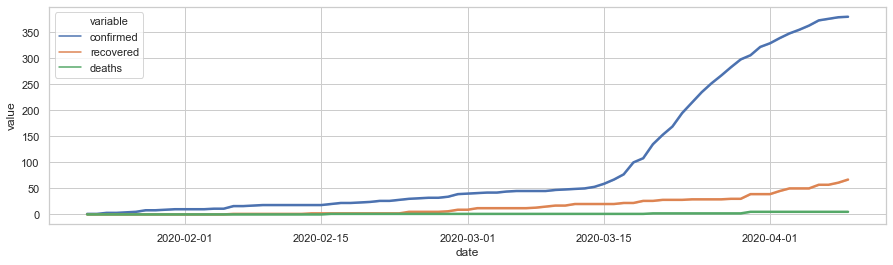

In [230]:
compare_plot('taiwan', 'us')
# df1 = history('taiwan')
# df2 = history('us')
# df3 = pd.concat([df1, df2], axis=0)

# df3

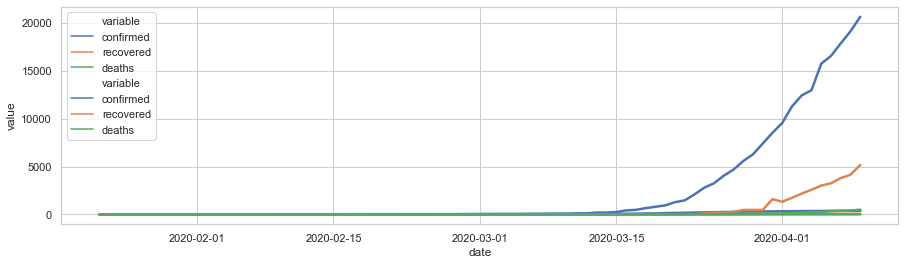

In [239]:
df1 = history('taiwan')
df2 = history('canada')

plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1,1,1)

sns.lineplot(data=pd.melt(df1[['date', 'confirmed', 'recovered', 'deaths']], id_vars='date'), 
             x='date', 
             y='value',
             hue='variable',
             linewidth=2.5, 
             ax=ax1);
sns.lineplot(data=pd.melt(df2[['date', 'confirmed', 'recovered', 'deaths']], id_vars='date'), 
             x='date', 
             y='value',
             hue='variable',
             linewidth=2.5, 
             ax=ax1);




In [224]:
history('taiwan')

,date,confirmed,change_confirmed,recovered,change_recovered,deaths,change_deaths
0,2020-01-22,1,na,0,na,0,na
1,2020-01-23,1,0.0,0,na,0,na
2,2020-01-24,3,2.0,0,na,0,na
3,2020-01-25,3,0.0,0,na,0,na
4,2020-01-26,4,0.3333333333333333,0,na,0,na
...,...,...,...,...,...,...,...
74,2020-04-05,363,0.022535211267605635,50,0.0,5,0.0
75,2020-04-06,373,0.027548209366391185,57,0.14,5,0.0
76,2020-04-07,376,0.00804289544235925,57,0.0,5,0.0
77,2020-04-08,379,0.007978723404255319,61,0.07017543859649122,5,0.0


In [ ]:
class Dataset:
    def __init__(self):
        
    def initAPI(self):
        self.api = CovId19Data(force=False)
    
class Preprocess(Dataset):
    
    def hist2df(self, data):
        
        
        

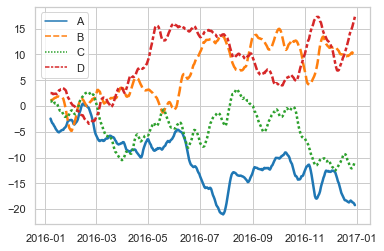

In [186]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## Display map of countries with cases

In [35]:
from bokeh.io import output_notebook # show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure, show
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

output_notebook()

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "ca"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)


Loading BokehJS ...